# **Bank Customer Churn Analysis**

## **Goal**
_In this project I explore customer data to understand which factors contribute to churn.  
I perform data preparation, exploratory analysis, visualization, and build predictive models to identify high-risk customers._

**Dataset:**  
_Bank churn dataset (10,000 customers) containing demographic and financial attributes._

The notebook follows a structured workflow:

**1. Data Preparation** - Tasks in this phase prepare the dataset before analysis and modelling:
- **Setup:** Import libraries and configure the working environment.  
- **Data Loading:** Read the dataset and inspect its structure.  
- **Data Cleaning:** Fix missing values, duplicates, and incorrect data types.

**2. Exploratory Data Analysis (EDA)** - Explore patterns, relationships, and distributions to understand the drivers of churn:
- **Descriptive Statistics:** Summarize key customer characteristics.  
- **Correlation Analysis:** Identify variables associated with churn.  
- **Feature Grouping & Transformation:** Create meaningful categories for comparison.  
- **Visualization (Python + Power BI):** Explore churn patterns through charts and an interactive dashboard.

**3. Develop churn prediction models** - Build and evaluate predictive models including:
- **Logistic Regression**  
- **K-Nearest Neighbors (KNN)**  
- **XGBoost**

These models estimate churn probability and help identify high-risk customers.


## **1. Data Preparation**
**Importing the necessary libraries for this project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Data Overview**

In [2]:
churn = pd.read_csv("../data/churn.csv", index_col='CustomerId')
churn.shape

(10000, 13)

This dataset has 10000 observations and 13 variables.

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
churn.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
churn.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Cleaning the data**

In [6]:
# Checking for missing data
print(churn.isna().sum())
churn.drop_duplicates(inplace=True)

RowNumber          0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


There are no null or NA values, and any duplicate records have been removed from the dataset. We can now proceed to exploratory data analysis (EDA) to better understand the features and their relationship with customer churn.

## **2. Exploratory Data Analysis (EDA)**

**Churn overview**

Churn Rate: 20.37%


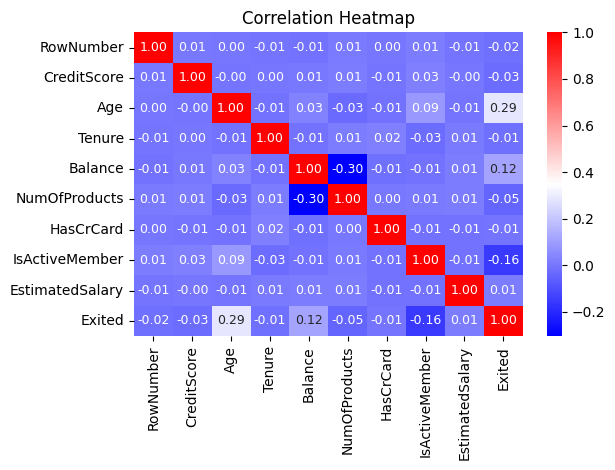

In [7]:
# Churn overview
churn_rate = churn['Exited'].value_counts(normalize=True) * 100
print(f"Churn Rate: {churn_rate[1]:.2f}%")

# Explore the correlation between numerical features and churn
correlation = churn.corr(numeric_only=True)
sns.heatmap(correlation,annot=True,fmt=".2f",cmap='bwr',annot_kws={"size": 9})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Based on the churn rate and the correlation analysis between numerical features and churn, we can draw some insights:

- **Overall Churn Rate:** 20.37%  
  Approximately 20 out of every 100 customers have stopped using the bank's services. This is a notable proportion, underlying the need of analyzing the factors driving churn and building predictive models to anticipate future churn.

- **Correlation with Exited (Churn) variable:**  
  - **Age:** Positive correlation of 0.29 (most significant among numerical features)  
  -> Older customers are more likely to churn.  
  - **IsActiveMember:** Negative correlation of −0.16 (most significant negative correlation)  
  -> Inactive members (IsActiveMember = 0) have a higher probability of leaving.  
  - **Balance:** Weak positive correlation of 0.12  
  -> Customers with higher account balances are slightly more likely to churn.  
  - **Other variables:** Correlation coefficients are close to 0  
  -> These variables show very weak linear relationships with churn.

> Overall, the correlations between numerical features and churn are generally moderate or negligible, suggesting that most variables have limited linear relationships with customer churn. **Age**, **IsActiveMember**, **Balance** are the most influential features for churn among numeric/binary variables, and should be the focus for retention strategies.

**Analyzing customer churn by age**

Age statistics by Churn status:
         mean    std   min   max
Exited                          
0       37.41  10.13  18.0  92.0
1       44.84   9.76  18.0  84.0


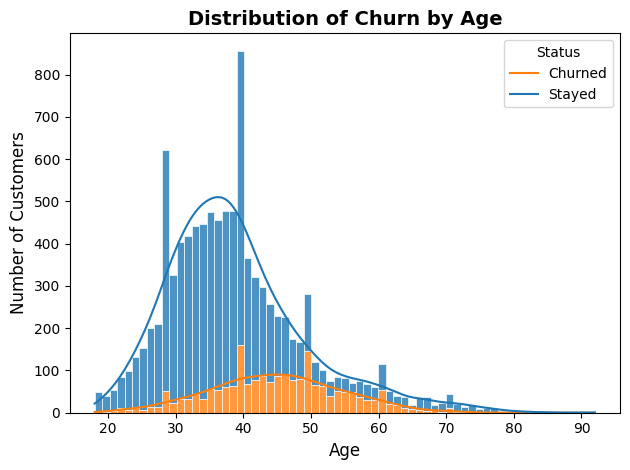

In [8]:
# Descriptive satistics of churn by age
age_summary = churn.groupby('Exited')['Age'].describe()[['mean', 'std', 'min','max']].round(2)
print("Age statistics by Churn status:", age_summary, sep="\n")

# Distribution of churn by age
sns.histplot(data = churn, x='Age', hue='Exited',kde=True, stat='count',multiple='stack',alpha=0.8,edgecolor='white')
plt.title('Distribution of Churn by Age',fontsize=14,fontweight='bold')
plt.xlabel('Age',fontsize=12)
plt.ylabel('Number of Customers',fontsize=12)
plt.legend(title='Status', labels=['Churned', 'Stayed'])
plt.tight_layout()
plt.show()


Based on the distribution analysis and descriptive statistics between age and churn, we can draw some insights:

- **Distribution Analysis:**
  - **Loyal Customers (Exited = 0)**: This group is predominantly younger. The histogram shows a large concentration of loyal customers peaking around 35-40 years old. 
  - **Churned Customers (Exited = 1)**: This group skews significantly older. The histogram's peak for churners is visibly later, concentrated around 40-50 years old.

- **Statistical analysis:** the mean age for customers who churned is around 44.8 years, which is over 7 years older than the mean age of around 37.4 years for customers who stayed.

> Overall, some key ingishts can be summarized:
  - The highest likelihood of churn occurs when customers are in their 40s to 50s. This is the primary demographic for churn.
  - The core of the loyal customer base is younger, primarily under 40.

  -> A proactive strategy should be implemented to engage with customers as they approach the **40-year-old mark**. This could include loyalty programs, special offers, or check-in calls to address potential dissatisfaction before they decide to leave.

**Analyzing customer churn by activity status**

Churn statistics by Activity status:
                Total Customers  Churn Rate  Stayed Rate
IsActiveMember                                          
0                          4849        0.27         0.73
1                          5151        0.14         0.86


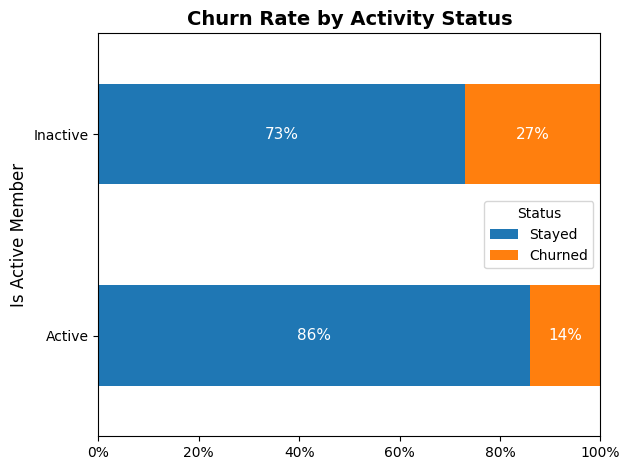

In [9]:
# Descriptive satistics of churn by activity status
activity_summary = churn.groupby('IsActiveMember')['Exited'].agg(['count', 'mean']).round(2)
activity_summary['Stayed Rate']=1 - activity_summary['mean']
activity_summary.rename(columns={'count': 'Total Customers', 'mean': 'Churn Rate'}, inplace=True)
print("Churn statistics by Activity status:", activity_summary, sep="\n")

# Convert rates to percentages (each group totals 100%)
activity_perc = activity_summary[['Stayed Rate','Churn Rate']]*100

# Horizontal stacked bar plot of churn by activity status
ax=activity_perc.plot(kind='barh', stacked=True)
plt.title('Churn Rate by Activity Status',fontsize=14,fontweight='bold')
plt.ylabel('Is Active Member',fontsize=12)
ax.set_yticks([0,1], labels=['Inactive','Active'])
plt.legend(title='Status', labels=['Stayed', 'Churned'])

# Inver y-axis to have inactive members on top
ax.invert_yaxis()
# Limit x-axis to 0-100%
plt.xlim(0, 100)
# Format x-axis as percentages
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

# Show percentages on bars
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(p.get_x() + width / 2, p.get_y() + p.get_height() / 2,
                f'{int(width)}%', ha='center', va='center', color='white', fontsize=11)
                
plt.tight_layout()
plt.show()


Based on the horizontal stacker bar plot and descriptive statistics between activity status and churn, we can draw some insights:

- **Inactive Customers**: Although both groups are relatively similar in size, this group shows a notably higher churn rate of 27%. The lack of regular activity or engagement suggests these customers are more likely to leave the bank, possibly due to weak relationship maintenance.
- **Active Customers**: This group demonstrates a much lower churn rate of 14%, indicating that consistent engagement and activity correlate with customer retention.


> Overall, some key ingishts can be summarized:
  - Inactive customers represent the primary churn risk group, with nearly twice the churn rate of active members.
  - Customers who regularly interact with their accounts or services are less likely to leave.

  -> A retention strategy should be developed to re-engage inactive members. This could include personalized campaigns, reminders, or rewards for activity to enhance the relationship between customers and the bank.

Balance statistics by Churn status:
            mean       std  min        max
Exited                                    
0       72745.30  62848.04  0.0  221532.80
1       91108.54  58360.79  0.0  250898.09
Churn statistics by Balance group:
                Total Customers  Churn Rate  Stayed Rate
BalanceGroup                                            
Zero Balance               3617        0.14         0.86
Low Balance                2107        0.21         0.79
Medium Balance             2169        0.27         0.73
High Balance               2107        0.23         0.77


C:\Users\admin\AppData\Local\Temp\ipykernel_22828\3614693181.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_group_summary = churn.groupby('BalanceGroup')['Exited'].agg(['count', 'mean']).round(2)


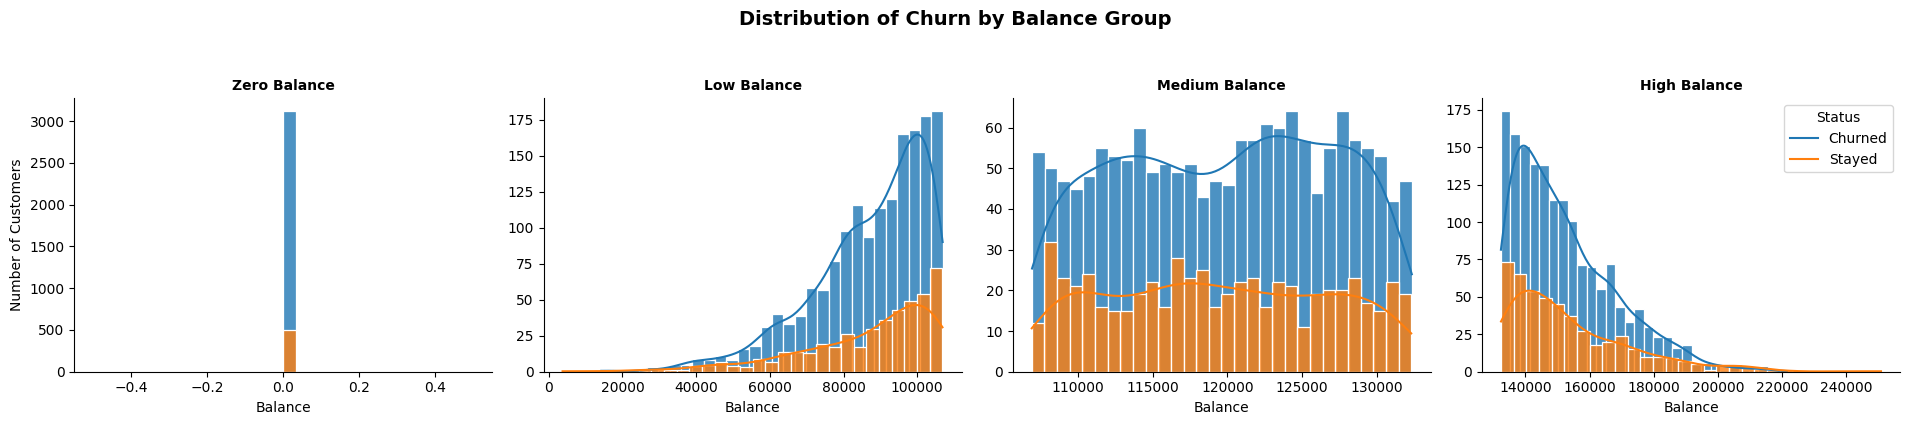

In [10]:
# Descriptive satistics of churn by balance
balance_summary = churn.groupby('Exited')['Balance'].describe()[['mean', 'std', 'min','max']].round(2)
print("Balance statistics by Churn status:", balance_summary, sep="\n")

# Grouping zero balance separately and dividing the rest into three equal groups
q1 = churn[churn['Balance'] > 0]['Balance'].quantile(0.33)
q2 = churn[churn['Balance'] > 0]['Balance'].quantile(0.67)
max_balance = churn['Balance'].max()

# Define bins and labels
balance_bins = [-1, 0, q1, q2, max_balance]
balance_labels = ['Zero Balance', 'Low Balance', 'Medium Balance', 'High Balance']
churn['BalanceGroup'] = pd.cut(churn['Balance'], bins=balance_bins, labels=balance_labels)

# Descriptive satistics of churn by balance group
balance_group_summary = churn.groupby('BalanceGroup')['Exited'].agg(['count', 'mean']).round(2)
balance_group_summary['Stayed Rate']=1 - balance_group_summary['mean']
balance_group_summary.rename(columns={'count': 'Total Customers', 'mean': 'Churn Rate'}, inplace=True)
print("Churn statistics by Balance group:", balance_group_summary, sep="\n")


# Distribution of churn by balance group
g = sns.FacetGrid(churn, col='BalanceGroup', hue='Exited',
                  sharex=False, sharey=False, height=4, aspect=1.2)
g.map(sns.histplot, 'Balance', bins=30, multiple='stack', kde=True, alpha=0.8, edgecolor='white')
g.set_titles("{col_name}", fontsize=12, fontweight='bold')
g.set_axis_labels('Balance', 'Number of Customers')
g.fig.suptitle('Distribution of Churn by Balance Group', fontsize=14, fontweight='bold', y=1.05)
plt.legend(title='Status', labels=['Churned', 'Stayed'])
plt.tight_layout()
plt.show()


Based on the distribution plots and descriptive statistics across different balance groups, we can draw some insights:

- **Zero Balance Customers (3617 customers)**: 
  - Customers with no funds in their accounts form the largest portion of the base accounting for over one-third of all customers.
  - Despite their inactivity, this group has a churn rate of only 14%, significantly lower than other groups. This suggests that many zero balance customers maintain accounts with minimal engagement but do not close them. 
  - Their behaviour reflects passive retention rather than active loyalty.
- **Low Balance Customers (2107 customers)**: 
  - With balances mostly between £0 and £100,000, this group shows a churn rate of 21%. This marks the first sharp rise in churn as balances increase from zero.
  - These customers might be moderately active but are more likely to switch banks due to perceived low returns or service dissatisfaction.
- **Medium Balance Customers (2169 customers)**: 
  - Customers in this category maintain balances around £110,000–£130,000 and show the highest churn rate of 27%.
  - Despite holding significant balances, these customers are the most likely to leave
  - This segment represents a high-value yet high-risk group, where retention initiatives can yield the greatest impact.
- **High Balance Customers (2107 customers)**: 
  - Customers with balances above £140,000 exhibit a churn rate of 23%, slightly lower than the medium group but still substantial.
  - Although they are fewer in number, their financial value is much higher, and any loss from this segment has a large business impact.
  - These customers may be wealthy and well-informed, managing multiple banking relationships or shifting funds between different banks for better investment opportunities.


> Overall, some key ingishts can be summarized:
  - Churn shows a non-linear trend, which is increasing from low to medium balances, then slightly declining at high balances.
  - Zero balance customers showing low risk but low profit retention.
  - High value customers (medium and high balance) contribute disproportionately to churn losses, even though they form a smaller proportion of the total base.

  -> Targeted retention strategies should prioritise medium and high balance customers. Despite they are representing a smaller share of the base, they actually contribute most to churn losses. These strategies can conduct through personalised engagement, loyalty rewards or premium financial support.

**Analysis by Categorical Variables: Gender and Geography**

The analysis for *Gender* and *Geography* is carried out in the Power BI report located in the `powerbi/churn.pbix` file, using interactive visualisation for clearer segmentation.

## **3. Develop churn prediction models**

This notebook builds a churn prediction model using:
- Logistic Regression
- K-Nearest Neighbors
- XGBoost 

Key steps:
1. Data split and preprocessing
2. Baseline model comparison using cross-validation (ROC-AUC)
3. Handling class imbalance (SMOTE and `scale_pos_weight`)
4. Hyperparameter tuning with `GridSearchCV`
5. Evaluation on the test set (ROC-AUC, confusion matrix, classification report, ROC-curve) 
6. Model selection with a business-focused perspective (prioritising recall for churn)
7. Retraining the selected model on the full dataset and generating churn probabilities
8. SHAP analysis to understand feature importance and interpret model outputs

**Train–test split and class distribution check**

In [11]:
# Import important libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    auc,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [12]:
# Prepare data for modeling
X = churn.drop(columns=["RowNumber", "Surname", "Exited"])
y = churn['Exited']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=16, stratify=y
)

In [ ]:
# Check class distribution in full dataset, training set, and test set
print("Class distribution in full dataset:")
print(y.value_counts(normalize=True))
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

Class distribution in full dataset:
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

Class distribution in training set:
Exited
0    0.79625
1    0.20375
Name: proportion, dtype: float64

Class distribution in test set:
Exited
0    0.7965
1    0.2035
Name: proportion, dtype: float64


- The train and test sets preserve the original class distribution (~80% non-churn vs ~20% churn), confirming that the stratified split worked correctly.  
- This also highlights that the dataset is **imbalanced**, meaning the model may become biased toward predicting the majority class.  
- Handling this imbalance later is important to improve recall for the churn class and avoid missing high-risk customers.


**Identify column types and define preprocessing pipeline**

In [14]:
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Preprocessing pipelines for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

**Build baseline models and evaluate (No Imbalance Handling)**

We build three baseline models using a shared preprocessing pipeline:

- Logistic Regression
- K-Nearest Neighbors (KNN)
- XGBoost (without SMOTE, default class balance)

We evaluate them using stratified 5-fold cross-validation with ROC-AUC as the scoring metric.

In [28]:
# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=16)

# Baseline model pipelines
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=16, max_iter=1000))
])

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=16))
])

models = {
    'Logistic Regression': logreg_pipeline,
    'K-Nearest Neighbors': knn_pipeline,
    'XGBoost': xgb_pipeline
}

# Evaluate baseline models using cross-validation
baseline_auc = {}

print("Baseline ROC-AUC:")
for name, clf in models.items():
    scores = cross_val_score(
        clf,
        X_train,
        y_train,
        cv=cv,
        scoring="roc_auc",
        n_jobs=-1
    )
    baseline_auc[name] = scores.mean()
    print(f"{name}: {scores.mean():.4f} (± {scores.std():.4f})")

Baseline ROC-AUC:
Logistic Regression: 0.7661 (± 0.0152)
K-Nearest Neighbors: 0.7838 (± 0.0134)
XGBoost: 0.8404 (± 0.0111)


- XGBoost achieves the highest baseline ROC-AUC (~0.84), outperforming Logistic Regression and KNN.  
- However, all models are trained on an imbalanced dataset (~20% churn), which can limit their ability to detect churners.  
- In the next step, we will address class imbalance to improve recall for the churn class and build more robust models.


**Handling Class Imbalance**

- For **Logistic Regression** and **KNN**:
  - We use `SMOTE` inside an `ImbPipeline` to oversample the minority class on the training folds.
- For **XGBoost**:
  - We use the `scale_pos_weight` parameter instead of SMOTE.

In [16]:
# Compute scale_pos_weight for XGBoost
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print(f"Scale_pos_weight for XGBoost: {scale_pos_weight:.2f}")

# Pipelines with SMOTE for Logistic Regression and KNN
logreg_smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=16)),
    ('classifier', LogisticRegression(random_state=16, max_iter=1000))
])

knn_smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=16)),
    ('classifier', KNeighborsClassifier())
])

# XGBoost pipeline with scale_pos_weight
xgb_weighted_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss',
                                 random_state=16, scale_pos_weight=scale_pos_weight))
])

# Imbalanced models dictionary
imbalanced_models = {
    'Logistic Regression with SMOTE': logreg_smote_pipeline,
    'K-Nearest Neighbors with SMOTE': knn_smote_pipeline,
    'XGBoost with scale_pos_weight': xgb_weighted_pipeline
}

# Evaluate imbalanced models using cross-validation
imbalanced_auc = {}
print("Imbalanced ROC-AUC:")
for name, clf in imbalanced_models.items():
    scores = cross_val_score(
        clf,
        X_train,
        y_train,
        cv=cv,
        scoring="roc_auc",
        n_jobs=-1
    )
    imbalanced_auc[name] = scores.mean()
    print(f"{name}: {scores.mean():.4f} (± {scores.std():.4f})")


Scale_pos_weight for XGBoost: 3.91
Imbalanced ROC-AUC:
Logistic Regression with SMOTE: 0.7695 (± 0.0150)
K-Nearest Neighbors with SMOTE: 0.7780 (± 0.0148)
XGBoost with scale_pos_weight: 0.8380 (± 0.0094)


**Hyperparameter Tuning**

We tune:
- Logistic Regression + SMOTE
- KNN + SMOTE
- XGBoost (with `scale_pos_weight`)

using `GridSearchCV` optimising ROC-AUC.


In [17]:
 # Tune Logistic Regression with SMOTE
param_grid_log = {
    "classifier__C": [0.01, 0.1, 1, 5, 10],
    "classifier__penalty": ["l2"],
    "classifier__solver": ["lbfgs"],
    "classifier__class_weight": [None, "balanced"]
}

log_grid = GridSearchCV(
    estimator=logreg_smote_pipeline,
    param_grid=param_grid_log,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1
)

log_grid.fit(X_train, y_train)
tune_log = log_grid.best_estimator_
tune_log_params = log_grid.best_params_

print("Best Logistic Regression with SMOTE parameters:")
print(tune_log_params)



Best Logistic Regression with SMOTE parameters:
{'classifier__C': 0.01, 'classifier__class_weight': None, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


In [18]:
# Tune KNN with SMOTE
param_grid_knn = {
    "classifier__n_neighbors": [3, 5, 7, 9, 11],
    "classifier__weights": ["uniform", "distance"],
    "classifier__metric": ["euclidean", "manhattan"]
}

knn_grid = GridSearchCV(
    estimator=knn_smote_pipeline,
    param_grid=param_grid_knn,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1
)

knn_grid.fit(X_train, y_train)
tune_knn = knn_grid.best_estimator_
tune_knn_params = knn_grid.best_params_
print("Best KNN with SMOTE parameters:")
print(tune_knn_params)

Best KNN with SMOTE parameters:
{'classifier__metric': 'euclidean', 'classifier__n_neighbors': 11, 'classifier__weights': 'distance'}


In [19]:
# Tune XGBoost with scale_pos_weight
param_grid_xgb = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__subsample": [0.7, 0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=xgb_weighted_pipeline,
    param_grid=param_grid_xgb,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)
tune_xgb = xgb_grid.best_estimator_
tune_xgb_params = xgb_grid.best_params_
print("Best XGBoost with scale_pos_weight parameters:")
print(tune_xgb_params)

Best XGBoost with scale_pos_weight parameters:
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}


**Evaluation on Test Set**

We evaluate the tuned models on the test set using:
- ROC-AUC
- Classification report
- Confusion matrix
- ROC curve

We focus on:
- ROC-AUC (overall ranking)
- Recall for class 1 (churn), which is important for business decision making.

Evaluating Tuned Logistic Regression with SMOTE:
ROC-AUC: 0.7630

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1593
           1       0.38      0.66      0.49       407

    accuracy                           0.72      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.79      0.72      0.74      2000



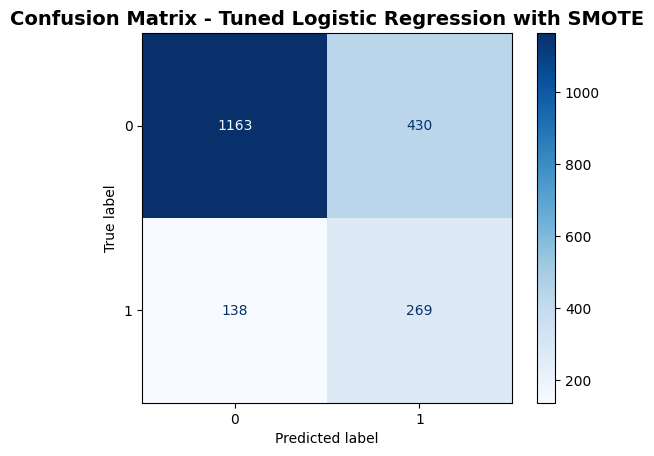

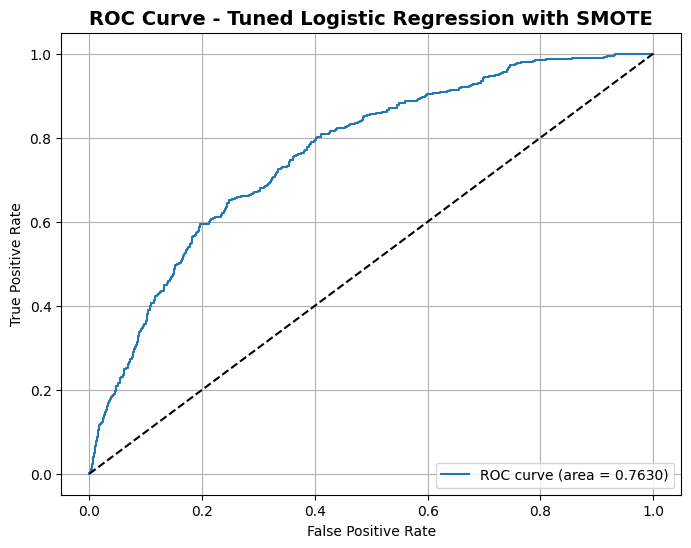

Evaluating Tuned KNN with SMOTE:
ROC-AUC: 0.7944

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1593
           1       0.43      0.70      0.53       407

    accuracy                           0.75      2000
   macro avg       0.67      0.73      0.68      2000
weighted avg       0.81      0.75      0.77      2000



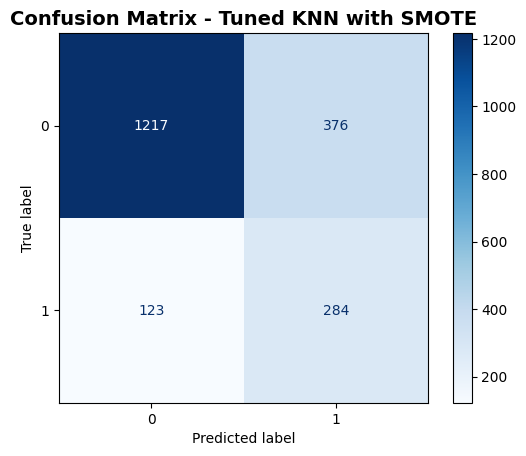

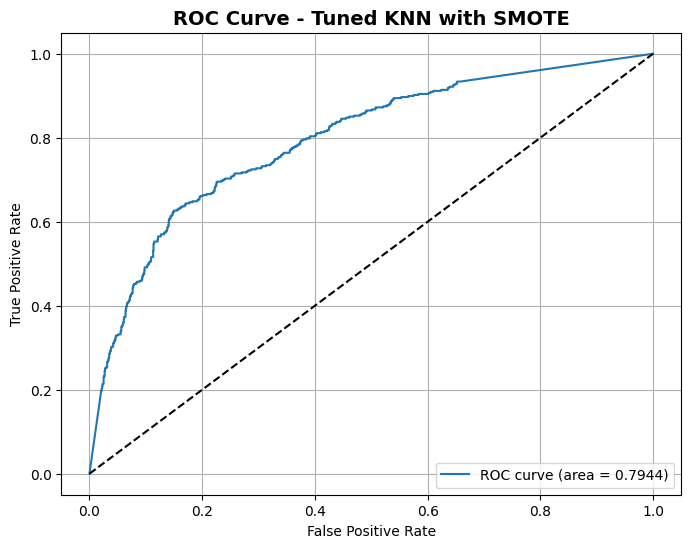

Evaluating Tuned XGBoost with scale_pos_weight:
ROC-AUC: 0.8569

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1593
           1       0.50      0.73      0.60       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.80      0.81      2000



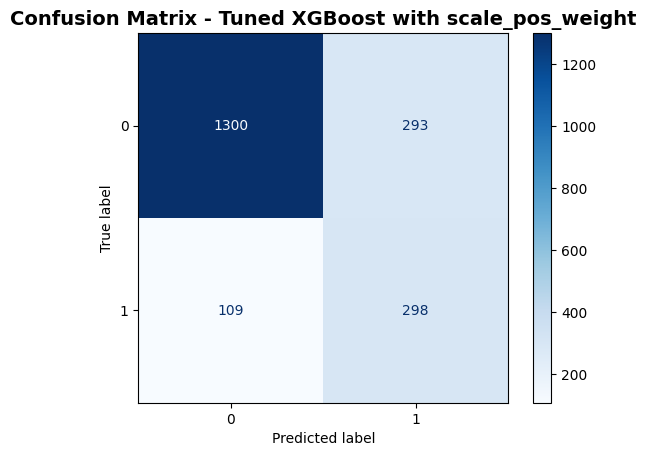

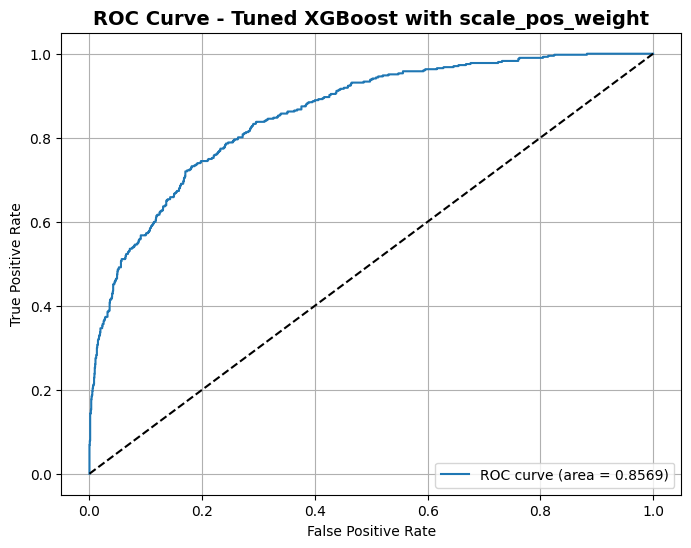

In [20]:
# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test, name="Model"):
    print(f"Evaluating {name}:")

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC-AUC
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC: {roc_auc:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}', fontsize=14, fontweight='bold')
    plt.show()

    #ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name}', fontsize=14, fontweight='bold')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    return roc_auc

# Evaluate tuned models 
auc_log = evaluate_model(tune_log, X_train, y_train, X_test, y_test, name="Tuned Logistic Regression with SMOTE")
auc_knn = evaluate_model(tune_knn, X_train, y_train, X_test, y_test, name="Tuned KNN with SMOTE")
auc_xgb = evaluate_model(tune_xgb, X_train, y_train, X_test, y_test, name="Tuned XGBoost with scale_pos_weight")


**Model Evaluation**

When predicting churn, **False Negatives (FN)** are the most critical error, as FN represents a customer who churn but the model predicts non-churn, meaning the bank completely misses the opportunity to intervene.  
Therefore, recall for the churn class and the absolute FN count are key metrics for business impact.

1. Tuned Logistic Regression with SMOTE
- **ROC-AUC:** 0.763  
- **Recall (churn):** 0.66  
- **FN:** 138  

-> Logistic Regression still misses a large number of churners, as the high FN count indicates that many at-risk customers remain undetected.

2. Tuned KNN with SMOTE
- **ROC-AUC:** 0.794  
- **Recall (churn):** 0.70  
- **FN:** 123  

-> KNN provides a noticeable improvement in recall and reduces FN compared to Logistic Regression.However, it still fails to catch over 120 churners in the test set.

3. Tuned XGBoost with `scale_pos_weight`
- **ROC-AUC:** 0.857  
- **Recall (churn):** 0.73  
- **FN:** 109  

-> XGBoost achieves the **highest ROC-AUC**, **highest recall**, and the **lowest FN** among all models. It misses the fewest churners, making it the most effective model.

> Overall: **XGBoost clearly delivers the strongest business value** by minimizing False Negatives, makes it the preferred model for identifying customers at risk of leaving.


**Retrain Final Model on Full Dataset and Score All Customers**

After evaluating different models on the train/test split and selecting the best-performing model, we now:

1. Retrain the **final chosen model** on the **full labelled dataset (X, y)** to use all available information.
2. Use this final model to:
- Predict the **churn probability** for every customer in the dataset.
- Optionally assign **risk segments** based on the predicted probability.

In [21]:
# Train final model on entire set
final_model = tune_xgb
final_model.fit(X,y)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [22]:
# Calculate churn probability for all customers
churn_scored = churn.copy()
churn_scored['Churn_Probability'] = final_model.predict_proba(X)[:, 1]
churn_scored.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceGroup,Churn_Probability
CustomerId,,,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Zero Balance,0.629136
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Low Balance,0.426446
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,High Balance,0.975463
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Zero Balance,0.161303
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Medium Balance,0.373919


In [23]:
# Assign risk categories based on churn probability
churn_scored['Churn_Risk_Category'] = pd.cut(
    churn_scored['Churn_Probability'],
    bins=[-0.01, 0.2, 0.5, 1.0],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

# Distribution of customers by churn risk category
risk_order = ['Low Risk', 'Medium Risk', 'High Risk']
churn_scored['Churn_Risk_Category'].value_counts(normalize=True).reindex(risk_order) * 100

Churn_Risk_Category
Low Risk       33.67
Medium Risk    36.08
High Risk      30.25
Name: proportion, dtype: float64

The segmentation shows a near-even split. A large share falls into Medium to High risk, indicating clear targets for focused retention, especially the High Risk group.


**Interpreting Model Predictions with SHAP**

In [24]:
import shap

#Take preporcessor and model from the pipeline
preprocessor = final_model.named_steps['preprocessor']
model = final_model.named_steps['classifier']

# Take feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

#Transform full dataset for SHAP background
X_transformed = preprocessor.transform(X)

# Create SHAP explainer
explainer = shap.Explainer(model, X_transformed, feature_names=feature_names)
# Calculate SHAP values for full dataset
shap_values = explainer(preprocessor.transform(X))

 95%|=================== | 9467/10000 [00:15<00:00]       

In [25]:
shap_values.shape

(10000, 11)

The shape (10000, 11) means SHAP computed contributions for 10,000 customers across 11 model features.

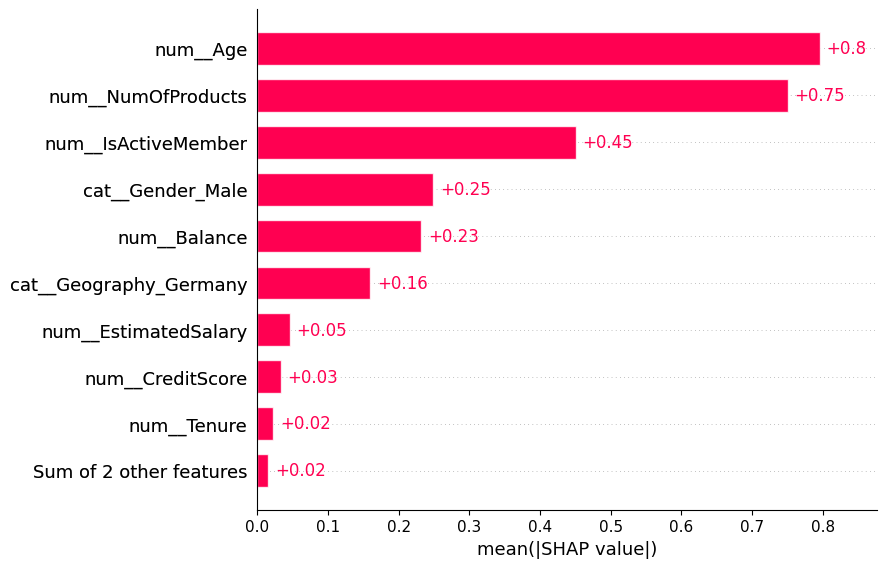

In [26]:

shap.plots.bar(shap_values)

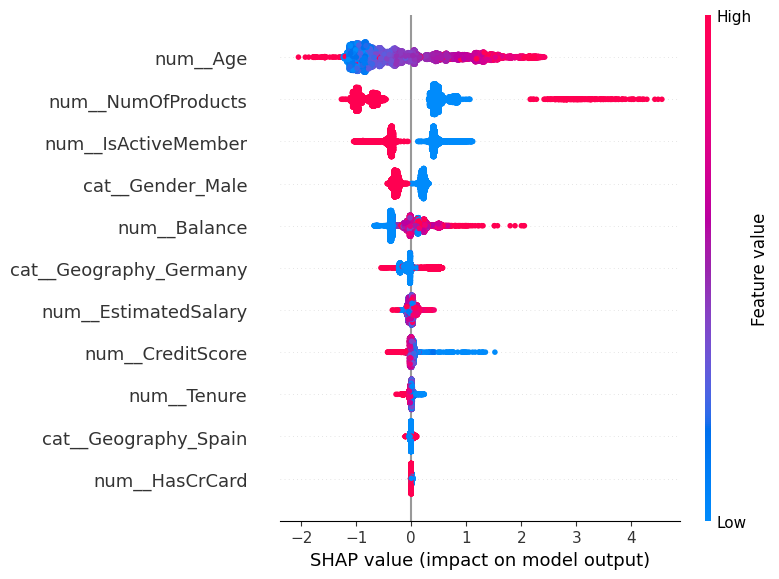

In [27]:
# SHAP summary plot
shap.summary_plot(shap_values)

**SHAP Insights**

The bar plot shows that the three most influential drivers of churn are **Age**, **Number of Products**, and **Active Member status**. These features have the highest average SHAP values, meaning they consistently play the largest role in shaping the model’s predictions.

The summary plot then reveals the direction of their influence:
- **Age:** Higher ages push the prediction toward churn, indicating that older customers are more likely to leave.
- **Active Member:** Active customers generally pull the prediction down, reducing churn risk, while inactive customers push it up.
- **Number of Products:** The most notable pattern appears in this feature. In general, customers with **fewer products** (blue points) show higher churn risk, which is expected, because low product usage often reflects weak engagement. However, the summary plot also reveals a cluster of **high-product customers** with strong positive SHAP values, meaning they still drive churn. 
-> This suggests a threshold effect: up to a point, more products reduce churn, but beyond that, some customers with many products still leave. This could reflect dissatisfaction, product complexity, or unmet expectations despite a broad product portfolio.


In short, Age and engagement behave as expected, while the mixed pattern for Number of Products highlights a segment where product count alone does not guarantee loyalty.